This notebook generates the table with information about protein complexes

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm
sns.set_palette('Dark2')
sns.set_style({'axes.axisbelow': True, 'axes.edgecolor': '.15', 'axes.facecolor': 'white',
               'axes.grid': True, 'axes.labelcolor': '.15', 'axes.linewidth': 1.25, 
               'figure.facecolor': 'white', 'font.family': ['sans-serif'], 'grid.color': '.15',
               'grid.linestyle': ':', 'grid.alpha': .5, 'image.cmap': 'Greys', 
               'legend.frameon': False, 'legend.numpoints': 1, 'legend.scatterpoints': 1,
               'lines.solid_capstyle': 'round', 'axes.spines.right': False, 'axes.spines.top': False,  
               'text.color': '.15',  'xtick.top': False, 'ytick.right': False, 'xtick.color': '.15',
               'xtick.direction': 'out', 'xtick.major.size': 6, 'xtick.minor.size': 3,
               'ytick.color': '.15', 'ytick.direction': 'out', 'ytick.major.size': 6,'ytick.minor.size': 3})
sns.set_context('paper')

#http://phyletica.org/matplotlib-fonts/
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

Set up

In [2]:
from snapanalysis.config import OUTPUT_DIRECTORY as MAIN_OUTPUT_DIRECTORY
OUTPUT_DIRECTORY = os.path.join(MAIN_OUTPUT_DIRECTORY, 'ptm-response')

if not os.path.isdir(OUTPUT_DIRECTORY):
    os.makedirs(OUTPUT_DIRECTORY)
    
def output_path(basename):
    return os.path.join(OUTPUT_DIRECTORY, basename)

In [12]:
from snapanalysis.external.complexes.curated import OUTPUT_FILE as COMPLEXES_FILE

curated_complexes = pd.read_hdf(COMPLEXES_FILE, 'curated_complexes')

Data from camera

In [3]:
from snapanalysis.models.ptm_response.main import OUTPUT_FILE as PTM_RESPONSE_FILE

from snapanalysis.models.ptm_response.main import PREDICTOR_ORDER
predictors = PREDICTOR_ORDER

limma_results = pd.read_hdf(PTM_RESPONSE_FILE, '/ptm_stats/joint_limma_stats')
predictors_from_limma = limma_results.reset_index()['predictor'].unique()
assert all(p in predictors_from_limma for p in predictors)
assert all(p in predictors for p in predictors_from_limma)


with pd.HDFStore(PTM_RESPONSE_FILE, 'r') as store: 
    enrichment_complexes = store['/ptm_stats/joint_camera_complexes']

            

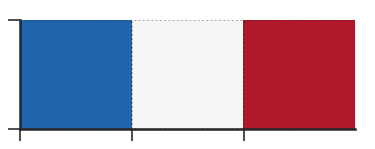

In [4]:
palette = sns.color_palette('RdBu_r', 9).as_hex()
blue = palette[0]
red = palette[-1]
white = palette[4]

sns.palplot([blue, white, red])

In [5]:
vmin = -1.5
vmax = 1.5

In [6]:
from snapanalysis.models.ptm_response.main import ENRICHMENT_FDR_THRESHOLD
ENRICHMENT_FDR_THRESHOLD

0.01

In [7]:
ABS_EFFECT_THRESHOLD = 0.25

In [8]:
enrichment_complexes

NGenes Direction  \
predictor Complex                                                               
H3K9me3   ncPRC1.6 (exclusive subunits)                         6.0        Up   
          ncPRC1.6                                             15.0        Up   
          SIN3A/B (exclusive subunits)                          9.0        Up   
          PRC1                                                  9.0        Up   
          CAF-1                                                 3.0        Up   
          BHC                                                   8.0        Up   
          HUSH                                                  4.0        Up   
          SIN3A/B                                              18.0        Up   
          KAP1-SETDB1-DNMT1-ZNF304                              3.0        Up   
          SF3B                                                  7.0      Down   
          INO80 (exclusive subunits)                           11.0        Up   
          KAP1-HP1                                              3.0        Up   
          B-MYB-MuvB                                            6.0        Up   
          SRCAP                                                 9.0      Down   
          ORC                                                   5.0        Up   
          B-MYB-MuvB (exclusive subunits)                       5.0        Up   
          ASAP                                                  6.0      Down   
          Integrator (exclusive subunits)                      13.0        Up   
          THO                                                   6.0      Down   
          Integrator                                           14.0        Up   
          PRC1 (exclusive subunits)                             6.0        Up   
          PR-DUB                                                5.0        Up   
          ncPRC1                                                5.0        Up   
          TREX                                                  9.0      Down   
          40S Ribosomal subunit                                29.0      Down   
          ncPRC1.1                                             11.0        Up   
          INO80                                                15.0        Up   
          Mediator                                             17.0        Up   
          NuA4 (exclusive subunits)                             6.0        Up   
          PRC2.1                                               12.0        Up   
...                                                             ...       ...   
H3ac      Mitochondrial respiratory chain complex I             4.0        Up   
          ncPRC1.1 (exclusive subunits)                         5.0        Up   
          CKM                                                   3.0        Up   
          mCRD-poly(A)-bridging complex                         3.0      Down   
          TFIID (exclusive subunits)                            4.0        Up   
          RNA Pol II (exclusive subunits)                       6.0        Up   
          NSL (exclusive subunits)                              3.0        Up   
          Base Excision Repair Complex (exclusive subunits)     3.0      Down   
          VHL SCF-like                                          4.0        Up   
          XPC (exclusive subunits)                              3.0        Up   
          Fanconi Anemia                                        4.0        Up   
          PRC2.1 (exclusive subunits)                           5.0        Up   
          RNA Pol II                                           11.0        Up   
          B-MYB-MuvB (exclusive subunits)                       5.0        Up   
          CRL4-DDB2                                             4.0        Up   
          CDCA5-PDS5-Cohesin                                    3.0        Up   
          VCB                                                   3.0        Up   
          S

In [13]:
curated_complexes

,Complex,Gene label,Member identifier,Source
6,40S Ribosomal subunit,FAU,FAU,"uniprot_search:""40S Ribosomal"""
7,40S Ribosomal subunit,RPS10/RPS10-NUDT3,RPS10,"uniprot_search:""40S Ribosomal"""
8,40S Ribosomal subunit,RPS11,RPS11,"uniprot_search:""40S Ribosomal"""
9,40S Ribosomal subunit,RPS12,RPS12,"uniprot_search:""40S Ribosomal"""
10,40S Ribosomal subunit,RPS13,RPS13,"uniprot_search:""40S Ribosomal"""
11,40S Ribosomal subunit,RPS14,RPS14,"uniprot_search:""40S Ribosomal"""
12,40S Ribosomal subunit,RPS15,RPS15,"uniprot_search:""40S Ribosomal"""
13,40S Ribosomal subunit,RPS15A,RPS15A,"uniprot_search:""40S Ribosomal"""
14,40S Ribosomal subunit,RPS16,RPS16,"uniprot_search:""40S Ribosomal"""
15,40S Ribosomal subunit,RPS17,RPS17,"uniprot_search:""40S Ribosomal"""


In [17]:
sorted_complexes = sorted(curated_complexes['Complex'].unique(), key=lambda x: x.lower())

In [53]:
curated_complexes_excel = curated_complexes.copy()
curated_complexes_excel = curated_complexes_excel.rename(columns={
    'Complex': 'Protein complex name',
    'Gene label': 'Our identifier',
    'Member identifier': 'Source identifier',
    'Source': 'Source'
})

curated_complexes_excel['Source'] = curated_complexes_excel['Source'].str.replace(';', '|')

In [68]:
sources = curated_complexes_excel['Source'].str.split('|', expand=True).stack()
sources = sources.str.partition(':')[0]
sources = sources.value_counts()

In [70]:
sources.sort_index()

corum             275
doi               518
ebi               805
epifactors        375
uniprot             7
uniprot_search     89
Name: 0, dtype: int64

In [79]:
import xlsxwriter

output_excel_filename = os.path.join(OUTPUT_DIRECTORY, 'ptm-response-complexes.xlsx')

writer = pd.ExcelWriter(output_excel_filename, engine='xlsxwriter')
workbook  = writer.book

format_header_level_two = workbook.add_format({'bold': True})
format_header_level_two.set_bottom(1) # add border
format_header_level_two.set_text_wrap()

format_header_level_one = workbook.add_format({'bold': True})
format_header_level_one.set_right(1) # add border
format_header_level_one.set_text_wrap()

format_header_level_two_corner = workbook.add_format({'bold': True})
# format_header_level_two_corner.set_shrink()
format_header_level_two_corner.set_right(1) # add border
format_header_level_two_corner.set_bottom(1) # add border
format_header_level_two_corner.set_text_wrap()

format_bold = workbook.add_format({'bold': True})

format_merged_left_header = workbook.add_format({
    'bold': True,
    'right': 1,
    'text_wrap': True,
    'align': 'center',
    'valign': 'vcenter',
    'bottom': 1,
})

format_border_bottom = workbook.add_format({
    'bottom': True,
})

legend_bg = '#f0f0f0'
format_legend = workbook.add_format({'bg_color': legend_bg})
format_bold_legend = workbook.add_format({'bold': True, 
                                          'bg_color': legend_bg})

format_bold_legend_bottom = workbook.add_format({'bold': True, 
                                                 'bottom': 1,
                                                 'align': 'center',
                                                 'left': 1,
                                                 'right': 1,
                                                 'top': 1,
                                                 'bg_color': legend_bg})

format_bold_legend_right = workbook.add_format({'bold': True, 
                                                'right': 1,
                                                'left': 1,
                                                'align': 'right',
                                                'bg_color': legend_bg})

format_legend_right = workbook.add_format({'bg_color': legend_bg, 'right': 1})

format_top = workbook.add_format({'top': 1})

format_bold_right = workbook.add_format({'bold': True})
format_bold_right.set_right(1)


# Format for groups - border
format_group_right_edge = workbook.add_format()
format_group_right_edge.set_right(1)


format_pct = workbook.add_format({'num_format': '0.00%'})
format_twodigits = workbook.add_format({'num_format': '0.00'})

conditional_format_options = {
  'type': '3_color_scale',
  'min_value': vmin,
  'max_value': vmax,
  'mid_value': 0,
  'min_type': 'num',
  'max_type': 'num',
  'mid_type': 'num',
  'min_color': blue,
  'mid_color': white,
  'max_color': red
}

## First sheet, curated complexdes

startrow = 1
complexes_list_sheet_name = 'Index of complexes'
complexes_worksheet = None
for complex_ in sorted_complexes:
    info = curated_complexes_excel[curated_complexes_excel['Protein complex name'] == complex_]
    info = info.sort_values(by=['Our identifier', 'Source identifier'])
    
    info_no_first_col = info.iloc(axis=1)[1:]
    
    info_no_first_col.to_excel(writer, sheet_name=complexes_list_sheet_name, 
                               startrow=startrow, startcol=1,
                               index=False, header=False)

    if complexes_worksheet is None:
        complexes_worksheet = writer.sheets[complexes_list_sheet_name]
        
    endrow = startrow + len(info) - 1
    
    # Complex name as merged column
    complexes_worksheet.merge_range(startrow, 0, endrow, 0, complex_, format_merged_left_header)
    complexes_worksheet.set_row(endrow, None, format_border_bottom)
    startrow += len(info)



for i, colname in enumerate(curated_complexes_excel.columns):
    if i == 0:
        format_ = format_header_level_two_corner
    else:
        format_ = format_header_level_two
        
    complexes_worksheet.write_string(0, i, colname, format_)

complexes_worksheet.merge_range(2, 5, 2, 6, 'Sources', format_bold_legend_bottom)
for row, (source, desc) in enumerate([
    ('corum', 'CORUM database (https://mips.helmholtz-muenchen.de/corum/)'),
    ('doi', 'Publication specified by Digital Object Identifier'),
    ('ebi', 'EBI Complex Portal (https://www.ebi.ac.uk/complexportal/)'),
    ('epifactors', 'EpiFactors database (http://epifactors.autosome.ru/)')
], start=3):
    complexes_worksheet.write_string(row, 5, source, format_bold_legend_right)
    complexes_worksheet.write_string(row, 6, desc, format_legend_right)

complexes_worksheet.write_string(row+1, 5, '', format_top)
complexes_worksheet.write_string(row+1, 6, '', format_top)
    
complexes_worksheet.set_column(0, 0, 20)
complexes_worksheet.set_column(1, 1, 20)
complexes_worksheet.set_column(2, 2, 20)
complexes_worksheet.set_column(3, 3, 40)

# legend
complexes_worksheet.set_column(5, 5, 10)
complexes_worksheet.set_column(6, 6, 60)

complexes_worksheet.freeze_panes(1, 1)

for predictor in tqdm(predictors):
    
    lr = enrichment_complexes.loc[predictor].copy()
    order = lr.sort_values(by='FDR').index
    
    lr = lr[['PValue', 'FDR', 'empirical_median', 'empirical_median_ci_left', 'empirical_median_ci_right', 'Direction', 'NGenes', 'mean_proteins', 'mean_significant']]
    lr = lr.reindex(order)
    
    lr = lr.rename(columns={'NGenes': '# proteins', 
                            'Direction': 'Effect direction',
                            'PValue': 'P value',
                            'FDR': 'Adjusted P value (BH)',
                            'empirical_median': 'Median effect',
                            'empirical_median_ci_left': 'Median effect (95% CI left)',
                            'empirical_median_ci_right': 'Median effect (95% CI right)',
                            'mean_proteins': 'Proteins for which response was measurable',
                            'mean_significant': '% significantly enriched proteins'
                            })
    
    lr['# proteins'] = lr['# proteins'].fillna(0).astype(int)
    
    output_df = lr.reset_index()
    
    
    first_row_data = 1
    last_row_data = first_row_data + len(output_df)  - 1
    # Write main data
    output_df.to_excel(writer, 
                       sheet_name=predictor, 
                       startrow=first_row_data,
                       index=False, header=False)
    
    worksheet = writer.sheets[predictor]
       
    first_col = 0
    last_col = len(output_df.columns) - 1
    
    # Write columns (second level headers)
    for i, col in enumerate(output_df.columns):
        if i == 0:
            format_ = format_header_level_two_corner
        else:
            format_ = format_header_level_two
            
        worksheet.write_string(0, i, col, format_)
        
        

    col_effect = list(lr.columns).index('Median effect') + 1
    col_effect_ci_left = list(lr.columns).index('Median effect (95% CI left)') + 1
    col_effect_ci_right = list(lr.columns).index('Median effect (95% CI right)') + 1
    
    col_p_value = list(lr.columns).index('Adjusted P value (BH)') + 1
    col_mean_significant = list(lr.columns).index('% significantly enriched proteins') + 1
    
    col_complex = 0
    col_proteins = list(lr.columns).index('Proteins for which response was measurable') + 1
    
    col_p_value_letter = xlsxwriter.utility.xl_col_to_name(col_p_value)
    
    worksheet.set_column(first_col, last_col, 10)
    worksheet.set_column(col_mean_significant, col_mean_significant, 10, format_pct)
    worksheet.set_column(col_complex, col_complex, 30)
    worksheet.set_column(col_proteins, col_proteins, 50)
    
#     worksheet.set_row(0, 0, 5)
    
    for col in [col_effect, col_effect_ci_left, col_effect_ci_right]:
        worksheet.set_column(col, col, 10, format_twodigits)
    
    for col in [col_effect, col_effect_ci_left, col_effect_ci_right]:
        worksheet.conditional_format(first_row_data, col,
                                     last_row_data, col, 
                                     conditional_format_options)
    
    worksheet.conditional_format(first_row_data, col_complex, 
                                  last_row_data, col_complex, 
                                 {
                                     'type':     'formula',
                                     'criteria': '=${}{} <= {}'.format(col_p_value_letter, first_row_data+1, ENRICHMENT_FDR_THRESHOLD),
                                     'format':   format_bold
                                 })
    
    worksheet.conditional_format(first_row_data, col_p_value, last_row_data, col_p_value, 
                                 {'type':     'cell',
                                 'criteria': 'less than or equal to',
                                 'value':    ENRICHMENT_FDR_THRESHOLD,
                                 'format':   format_bold})
    
    worksheet.freeze_panes(first_row_data, 1)
    worksheet.autofilter(first_row_data-1, 0, last_row_data, last_col)
    


writer.save()


100%|██████████| 15/15 [00:00<00:00, 27.35it/s]


,Complex,Gene label,Member identifier,Source
1327,ZAP3,ILF2,NF110/45,doi:10.1016/j.bbapap.2007.07.015
1328,ZAP3,ILF3,NF110/45,doi:10.1016/j.bbapap.2007.07.015
1329,ZAP3,KHDRBS1,SAM68,doi:10.1016/j.bbapap.2007.07.015
1330,ZAP3,NCOA5,CIA,doi:10.1016/j.bbapap.2007.07.015
1331,ZAP3,RBMX,hnRP-G,doi:10.1016/j.bbapap.2007.07.015
1332,ZAP3,YLPM1 (1),ZAP3,doi:10.1016/j.bbapap.2007.07.015
1333,ZAP3,YLPM1 (2),ZAP3,doi:10.1016/j.bbapap.2007.07.015
1334,ZAP3,YLPM1 (3),ZAP3,doi:10.1016/j.bbapap.2007.07.015
